# Latihan

*   Nama: Diah Ayu Puspasari
*   Rombel: DE02
*   NIM: 0110223052





In [1]:
# import library
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
# menghubungkan gdrive dengan colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# mengimpoert file dari google drive
path = '/content/drive/MyDrive/datasciece/dataset'

In [8]:
# membaca file csv menggunakan pandas
mydata = pd.read_csv(path + '/data_house.csv')
mydata

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [9]:
# melihat datatype dan spesfikasi data
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [10]:
# mencari hasil dari statistika deskriptif kolom float
mydata.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
# mengecek missing values data
mydata.isnull().sum()

,0
Unnamed: 0,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0


In [12]:
# menghitung rata rata harga rumah saja
mydata['price'].mean()

540088.1417665294

In [13]:
# menghitung rentang luas rumah yang dijual
mydata['sqft_living'].max() - mydata['sqft_living'].min()

13250

In [18]:
# menghitung jumlah rumah yang memiliki basement
jumlah_rumah_basement = (mydata['sqft_basement'] > 0).sum()
print("Jumlah rumah yang memiliki basement:", jumlah_rumah_basement)

Jumlah rumah yang memiliki basement: 8487


In [21]:
# menghitung umur rumah yang paling tua dengan harga
# Menambahkan kolom 'age'
yr_now = 2025
mydata['age'] = yr_now - mydata['yr_built']

# Menghitung
umur_tertua = mydata['age'].max()

# Menemukan rumah dengan umur tertua
rumah_tertua = mydata[mydata['age'] == umur_tertua]

# Menampilkan informasi rumah tertua
print("Informasi rumah tertua:")
print(rumah_tertua[['id', 'yr_built', 'age', 'price']])

Informasi rumah tertua:
               id  yr_built  age     price
14     1175000570      1900  125  530000.0
115    3626039325      1900  125  740500.0
498    9274202270      1900  125  625000.0
537    5694500105      1900  125  595000.0
703    7011200260      1900  125  485000.0
...           ...       ...  ...       ...
19063  1702901340      1900  125  718500.0
19137  3388110230      1900  125  179000.0
19319  4083302225      1900  125  850000.0
19385  2420069042      1900  125  240000.0
19598  7518507685      1900  125  400000.0

[87 rows x 4 columns]


In [22]:
# mmenghitung rata rata rumah yang memiliki satu lantai

# memfilter rumah yang memiliki satu lantai
floors1 = mydata[mydata['floors'] == 1]

# menghitung
rata_rata_harga = floors1['price'].mean()

print("Rata-rata harga rumah dengan satu lantai:", rata_rata_harga)

Rata-rata harga rumah dengan satu lantai: 442180.6325842697


In [23]:
import numpy as np

# Menentukan Q1 (25%), Q3 (75%), dan IQR
Q1 = mydata['price'].quantile(0.25)
Q3 = mydata['price'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outliers
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Menemukan outliers
outliers = mydata[(mydata['price'] < batas_bawah) | (mydata['price'] > batas_atas)]

# Menampilkan jumlah outliers
print("Jumlah outliers berdasarkan IQR:", outliers.shape[0])
print(outliers[['id', 'price']])  # Menampilkan beberapa data outlier

Jumlah outliers berdasarkan IQR: 1146
               id      price
5      7237550310  1225000.0
21     2524049179  2000000.0
49      822039084  1350000.0
69     1802000060  1325000.0
125    4389200955  1450000.0
...           ...        ...
21568   524059330  1700000.0
21576  9253900271  3567000.0
21590  7430200100  1222500.0
21597   191100405  1575000.0
21600   249000205  1537000.0

[1146 rows x 2 columns]


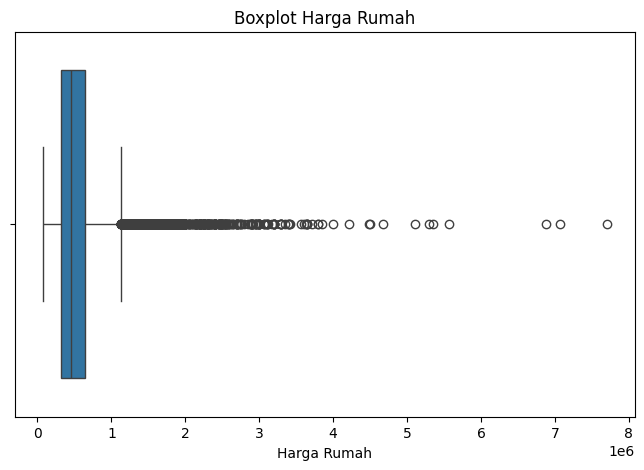

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat visualisasi boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=mydata['price'])
plt.title("Boxplot Harga Rumah")
plt.xlabel("Harga Rumah")
plt.show()

In [25]:
# Menampilkan rumah dengan harga lebih tinggi dari batas atas IQR
Q1 = mydata['price'].quantile(0.25)
Q3 = mydata['price'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR

outliers = mydata[mydata['price'] > batas_atas]
print(outliers[['id', 'price']].head(10))  # Melihat 10 rumah pertama yang termasuk outlier


             id      price
5    7237550310  1225000.0
21   2524049179  2000000.0
49    822039084  1350000.0
69   1802000060  1325000.0
125  4389200955  1450000.0
153  7855801670  2250000.0
216    46100204  1505000.0
246  2025069065  2400000.0
269  7960900060  2900000.0
270  4054500390  1365000.0


In [26]:
id_list = [7237550310, 2524049179, 822039084, 1802000060, 4389200955,
           7855801670, 46100204, 2025069065, 7960900060, 4054500390]

# Menampilkan detail baris berdasarkan ID
detail_rumah = mydata.loc[mydata['id'].isin(id_list)]
print(detail_rumah)

     Unnamed: 0          id             date      price  bedrooms  bathrooms  \
5             5  7237550310  20140512T000000  1225000.0         4       4.50   
21           21  2524049179  20140826T000000  2000000.0         3       2.75   
49           49   822039084  20150311T000000  1350000.0         3       2.50   
69           69  1802000060  20140612T000000  1325000.0         5       2.25   
125         125  4389200955  20150302T000000  1450000.0         4       2.75   
153         153  7855801670  20150401T000000  2250000.0         4       3.25   
216         216    46100204  20150221T000000  1505000.0         5       3.00   
246         246  2025069065  20140929T000000  2400000.0         4       2.50   
269         269  7960900060  20150504T000000  2900000.0         4       3.25   
270         270  4054500390  20141007T000000  1365000.0         4       4.75   

     sqft_living  sqft_lot  floors  waterfront  ...  sqft_basement  yr_built  \
5           5420    101930     1.0     

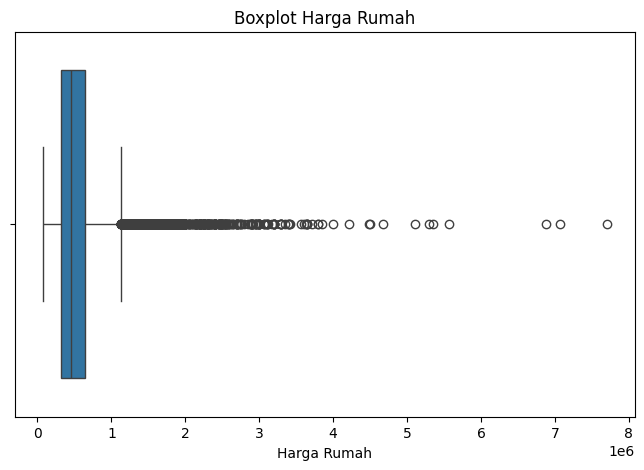

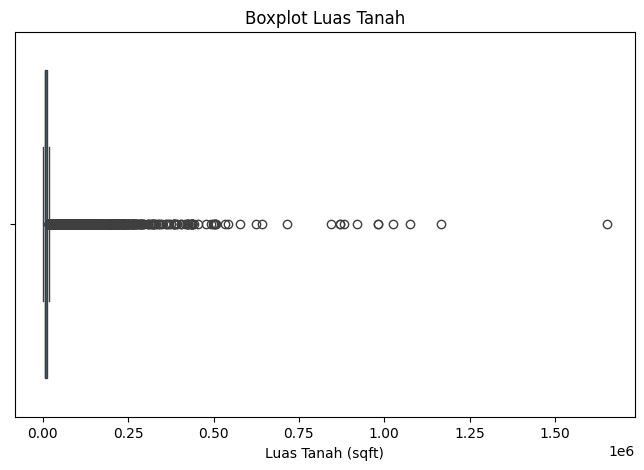

In [27]:
# Menampilkan boxplot harga rumah
plt.figure(figsize=(8, 5))
sns.boxplot(x=mydata['price'])
plt.title("Boxplot Harga Rumah")
plt.xlabel("Harga Rumah")
plt.show()

# Menampilkan boxplot luas tanah
plt.figure(figsize=(8, 5))
sns.boxplot(x=mydata['sqft_lot'])
plt.title("Boxplot Luas Tanah")
plt.xlabel("Luas Tanah (sqft)")
plt.show()

In [28]:
# Menghitung IQR untuk mendeteksi outlier
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)  # Kuartil 1
    Q3 = np.percentile(data[column], 75)  # Kuartil 3
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menyaring data outlier
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers

# Mendeteksi outliers harga rumah
outliers_price = detect_outliers_iqr(mydata, 'price')
print(f"Jumlah outlier pada harga rumah: {len(outliers_price)}")
print(outliers_price[['id', 'price']])

# Mendeteksi outliers luas tanah
outliers_sqft_lot = detect_outliers_iqr(mydata, 'sqft_lot')
print(f"Jumlah outlier pada luas tanah: {len(outliers_sqft_lot)}")
print(outliers_sqft_lot[['id', 'sqft_lot']])

Jumlah outlier pada harga rumah: 1146
               id      price
5      7237550310  1225000.0
21     2524049179  2000000.0
49      822039084  1350000.0
69     1802000060  1325000.0
125    4389200955  1450000.0
...           ...        ...
21568   524059330  1700000.0
21576  9253900271  3567000.0
21590  7430200100  1222500.0
21597   191100405  1575000.0
21600   249000205  1537000.0

[1146 rows x 2 columns]
Jumlah outlier pada luas tanah: 2425
               id  sqft_lot
5      7237550310    101930
12      114101516     19901
21     2524049179     44867
36     9435300030     34848
41     7766200013     24186
...           ...       ...
21494  2413910120     62726
21506  2524069097    130017
21520  7237550100     50621
21525  2625069038    108865
21548  8835770330    184231

[2425 rows x 2 columns]


In [30]:
# Menghitung jumlah rumah berdasarkan kondisi
condition_counts = mydata['condition'].value_counts()

# Menampilkan hasil
print("Jumlah rumah berdasarkan kondisi:")
print(condition_counts)

# Menampilkan kondisi rumah yang paling banyak
most_common_condition = condition_counts.idxmax()
most_common_count = condition_counts.max()

print(f"\nKondisi rumah yang paling banyak adalah {most_common_condition} dengan jumlah {most_common_count} rumah.")

Jumlah rumah berdasarkan kondisi:
condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

Kondisi rumah yang paling banyak adalah 3 dengan jumlah 14031 rumah.


In [34]:
print(len(mydata))  # Menampilkan jumlah baris dalam dataset

21613
